本节通过建立差分格式求解一维两点边值问题

\begin{equation}
\begin{cases}
  -u^{\prime \prime} + q(x)u = f(x) & a<x<b \\
  u(a) = \alpha, \quad u(b) = \beta
\end{cases}
\end{equation}


# 常用数值微分公式

+ 设$g(x) \in \color{red}{C^2[c, c+h]} \qquad $   则: $g^{\prime}(c) = \dfrac{1}{h}[g(c+h) - g(c)] - \dfrac{h}{2}g^{\prime \prime}(\xi_1) \quad \xi_1 \in (c, c+h) $
+ 设$g(x) \in \color{red}{C^2[c-h, c]} \qquad $   则: $g^{\prime}(c) = \dfrac{1}{h}[g(c) - g(c-h)] + \dfrac{h}{2}g^{\prime \prime}(\xi_2) \quad \xi_2 \in (c-h, c)$
+ 设$g(x) \in \color{red}{C^3[c-h, c+h]} \qquad $    则: $g^{\prime}(c) = \dfrac{1}{2h}[g(c+h) - g(c-h)] - \dfrac{h^2}{6}g^{\prime \prime \prime}(\xi_3) \quad \xi_3 \in (c-h, c+h)$
+ 设$g(x) \in \color{red}{C^4[c-h, c+h]} \qquad $  则: $g^{\prime \prime}(c) = \dfrac{1}{h^2}[g(c+h) - 2g(c) + g(c-h)] - \dfrac{h^2}{12}g^{(4)}(\xi_4) \quad \xi_4 \in (c-h, c+h)$
+ 设$g(x) \in \color{red}{C^3[c, c+h]} \qquad $  则: $g^{\prime}(c) = \dfrac{2}{h}[\dfrac{g(c+h) - g(c)}{h} - g^{\prime}(c)] - \dfrac{h}{3}g^{\prime \prime \prime}(\xi_5) \quad \xi_5 \in (c, c+h)$
+ 设$g(x) \in \color{red}{C^6[c-h, c+h]} \qquad $  则: $\dfrac{1}{12}[g^{\prime \prime}(c-h) + 10 g^{\prime \prime}(c) + g^{\prime \prime}(c+h)] = \dfrac{1}{h^2}[g(c-h)- 2g(c) + g(c+h)] + \dfrac{h^4}{240}g^{(6)}(\xi_6) \quad \xi_6 \in (c-h, c+h)$

# 差分格式的建立

## 将求解区间[a,b]进行网格剖分

将区间 $[a, b]$ 作 $m$ 等分， 记 $ h = \dfrac{b-a}{m}, \quad x_i = a + ih, \quad 0 \leq i \leq m, \quad \Omega_h = \left\lbrace x_i | 0 \leq i \leq m \right\rbrace$.

称 $h$ 为 $\color{red}{网格步长}$, $x_i$ 为$\color{red}{网格结点}$, $\Omega_h$ 为 $\color{red}{网格}$,称定义在网格 $\Omega_h$ 上的函数为$\color{red}{网格函数}$.   

设 $ v = \left\lbrace v_i| 0 \leq i \leq m \right\rbrace \qquad$ 为 $\Omega_h$ 上的网格函数,引入如下记号:

$V_{i - 1/2} = \dfrac{1}{2}(V_i + V_{i-1}), \quad \delta_x v_{i - 1/2} = \dfrac{1}{h}(v_i - v_{i-1}), \quad \delta_x^2v_i = \dfrac{1}{h} \left(\delta_x v_{i + 1/2} - \delta_x v_{i - 1/2} \ \right)$

$D_+v_i = \dfrac{1}{h} ( v_{i+1} - v_{i} ), \quad D_-v_i = \dfrac{1}{h} ( v_{i} - v_{i-1} )$

## 将方程离散化建立差分格式

在网格结点上考虑定解问题,有:

\begin{equation}
\begin{cases}
  -u^{\prime \prime}(x_i) + q(x_i)u(x_i) = f(x_i) & 1 \leq i \leq m-1 \\
  u(x_0) = \alpha, \quad u(x_m) = \beta
\end{cases}
\end{equation}

定义网格函数 $U = \left\lbrace U_i | 0 \leq i \leq m \right\rbrace$, 其中:
\begin{equation}
    U_i = u(x_i), \quad 0 \leq i \leq m 
\end{equation}

利用数值微分公式:

\begin{align}
    u^{\prime \prime}(x_i) & = \dfrac{1}{h^2}[u( x_{i - 1 } ) - 2u( x_i ) + u( x_{i+1} )] - \dfrac{h^2}{12}u^{(4)}(\xi_i)\\
        & = \delta_x^2U_i - \dfrac{h^2}{12}u^{(4)}(\xi_i) \quad \xi_i \in (x_{i-1}, x_{i+1})
\end{align}

将上式代入方程得:
\begin{equation}
\begin{cases}
    -\delta_x^2U_i + q(x_i)U_i = f(x_i) - \dfrac{h^2}{12}u^{(4)}(\xi_i), \quad 1 \leq i \leq m-1 \\ 
    U_0 = \alpha, \quad U_m = \beta
\end{cases}
\end{equation}

忽略高阶小量$ - \dfrac{h^2}{12}u^{(4)}(\xi_i) $ 并且利用 $u_i$ 代替 $U_i$得到如下近似格式

\begin{equation}
\begin{cases}
    -\delta_x^2u_i + q(x_i)u_i = f(x_i)  , \quad 1 \leq i \leq m-1 \\ 
    u_0 = \alpha, \quad u_m = \beta
\end{cases}
\end{equation}

将上式称为求解原系统的$ \color{red}{差分格式}$

以上格式中共有 $m+1$ 个方程以及 $m+1$ 个待定量 $u_0, u_1, \cdots, u_m$, 目标即求出 $ (u_0, u_1, \cdots, u_m) \qquad$, 将 $ u_i $ 视作  $ u(x_i) $ 的近似值, 容易注意到, 利用边界条件, 可以将原方程看成关于 $(u_1, u_2, \cdots, u_{m-1} ) \qquad$ 的 $ m-1 $ 阶线性方程组.

# 差分格式求解
## 将方程改写为矩阵方程

可以证明,上述建立的差分格式的解存在唯一, 下面考虑差分格式的求解.

重复原系统的差分格式如下:

\begin{equation}
\begin{cases}
    -\delta_x^2u_i + q(x_i)u_i = f(x_i)  , \quad 1 \leq i \leq m-1 \\ 
    u_0 = \alpha, \quad u_m = \beta
\end{cases}
\end{equation}

对第一个式子将 $ \delta_x^2u_i $ 展开:

\begin{equation}
    \delta_x^2u_i = \dfrac{1}{h^2}(u_{i-1} - 2u_i + u_{i+1})
\end{equation}

代入原方程中并且在两边同时乘以$ h^2 $得:

\begin{equation}
    -u_{i-1} + [2 + h^2q(x_i)]u_i- u_{i+1} = h^2f(x_i)
\end{equation}

结合边界条件,可以将上述方程组写为如下矩阵形式:

\begin{equation}
    \begin{pmatrix}
    1 & 0 & & & & \\
    -1 & 2 + h^2q(x_1) & -1 & & &\\
     & \ddots & \ddots & \ddots & \\
     & & - 1 & 2 + h^2q(x_{m-1}) & -1 \\
     & & & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
    u_0 \\u_1 \\ \vdots \\ u_{m-1} \\ u_m
    \end{pmatrix} = 
    \begin{pmatrix}
    \alpha \\ h^2f(x_1) \\ \vdots \\ h^2f(x_{m-1}) \\ \beta 
    \end{pmatrix}
\end{equation}

或者进一步整理为：
\begin{equation}
\begin{pmatrix}
    2 + h^2q(x_1) & -1 & & & \\
    -1 & 2 + h^2q(x_2) & -1 & & \\
      & \ddots & \ddots & \ddots & &\\
      &      &  -1  & 2 + h^2q(x_{m-2}\ ) & -1 \\
      &      &    &    -1  & 2 + h^2q(x_{m-1}\ )
\end{pmatrix}
\begin{pmatrix}
    u_1 \\ u_2 \\ \vdots \\ u_{m-2} \\u_{m-1}
\end{pmatrix}
= \begin{pmatrix}
    h^2f(x_1) + \alpha \\
     h^2f(x_2) \\
     \ddots \\
     h^2f(x_{m-2}\ ) \\
     h^2f(x_{m-1} + \beta \ )
\end{pmatrix}
\end{equation}

称上述方程为$ \color{red}{三对角方程}$

## 三对角方程求解

针对三对角方程的求解,可以采用$\color{red}{追赶法}$又称$\color{red}{Thomas算法}$进行求解,对于如下形式的三对角方程,追赶法算法如下:

\begin{equation}
    \begin{pmatrix}
    b1 & c1 &   &   &     \\
    a2 & b2 & c2 &   &     \\
      & a3 & b3 &   &     \\
      &\ddots & \ddots & \ddots &  \\
      &     &  a_{n-1} & b_{n-1} & c_{n-1}  \\
      &     &       &  a_n   & b_n 
    \end{pmatrix}
\end{equation}

消元过程:

\begin{equation}
    \begin{cases}
    \beta_1 = b_1, & y_1 = d_1 ;\\
    l_i = \dfrac{a_i}{\beta_{i - 1}} , & \beta_i = b_i - l_ic_{i - 1} \ , & y_i = d_i - l_iy_{i-1} & (i = 2,3, \cdots, n)
    \end{cases}
\end{equation}

回代过程:

\begin{equation}
    \begin{cases}
    x_n = y_n / \beta_n \ ,\\
    x_i = (y_i - c_ix_{i+1} \quad) / \beta_i \, & (i = n-1, n-2, \cdots, 1) 
    \end{cases}
\end{equation}


追赶法的程序实现如下:

In [1]:
import numpy as np
def thomas(a, b, c, d):
    n = len(b)
    x = np.zeros_like(b)
    y = np.zeros_like(b)
    beta = np.zeros_like(b)
    beta[0] = b[0]
    y[0] = d[0]
    for i in range(1, n):
        l = a[i-1] / beta[i-1]
        beta[i] = b[i] - l*c[i-1]
        y[i] = d[i] - l*y[i-1]
    x[n-1] = y[n-1]/beta[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - c[i]*x[i+1])/beta[i]
    return x

测试:    
求解三对角方程组:
    \begin{equation}
    A = \begin{pmatrix}
    2 & -1 & 0 & 0 & 0 \\
    -1 & 2 & -1 & 0 & 0 \\
    0 & -1 & 2 & -1 & 0 \\
    0 & 0 & -1 & 2 & -1 \\
    0 & 0 & 0 & -1 & 2 
    \end{pmatrix}
    \quad
    b = \begin{pmatrix} 
    1 \\ 0 \\ 1 \\ 0 \\ 0
    \end{pmatrix}
    \end{equation}
 预计求解结果:
  
\begin{equation}
x = \begin{pmatrix}
 1.3333333\\
 1.6666667\\
 2.0000000\\
 1.3333333\\
 1.6666667
\end{pmatrix}
\end{equation}

In [2]:
a = np.ones(4) * -1
b = np.ones(5) * 2
c = np.ones(4) * -1
d = np.array([1, 0, 1, 0, 0])
x = thomas(a, b, c, d)
x

array([1.33333333, 1.66666667, 2.        , 1.33333333, 0.66666667])

# 算例:   
编写一维二阶椭圆方程两点边值问题上述有限差分格式的程序   
并利用差分格式求解两点边值问题:
\begin{equation}
\begin{cases}
      -u^{\prime \prime}(x) + u(x) = e^x(\sin{x} - 2\cos{x}) & 0<x<\pi \\
      u(0) = 0, \quad u(\pi) = 0
\end{cases}
\end{equation}
分别利用 10， 20， 40， 80， 160的等距网格对上述方程进行求解，并且编写测试程序进行误差分析，绘制误差曲线    
已知上述两点边值问题的精确解为：$u(x) = e^x\sin{x}$

对上述方程再次重复有限差分流程如下:
## 对求解区间进行网格剖分
将区间 $[0, 1]$ 进行 $N$ 等分, $ h = \dfrac{1}{N} \ ,\ x_i =  ih \ (i = 0, 1, \cdots, N)$ 得到网格 $ \Omega_i = \left\lbrace x_i | i = 1, 2 ,\cdots, N\right\rbrace$

## 对方程进行有限差分离散得离散后的方程:
\begin{equation}
    \begin{cases}
        -\delta^2_xu_i + u_i = e^{x_i}(\sin{x_i}- 2\cos{x_i}) & 1 \leq i \leq N-1 \\
        u_0 = u_1 =0
    \end{cases}
\end{equation}

## 改写方程为矩阵形式
将 $ \delta_x^2u_i = \dfrac{u_{i-1}- 2u_i+u_{i+1}}{h^2} $代入原方程整理得三对角方程组：
\begin{equation}
\begin{pmatrix}
    2 + h^2x_1 & -1 & & & \\
    -1 & 2 + h^2x_2 & -1 & & \\
      & \ddots & \ddots & \ddots & &\\
      &      &  -1  & 2 + h^2x_{m-2} & -1 \\
      &      &    &    -1  & 2 + h^2x_{m-1}
\end{pmatrix}
\begin{pmatrix}
    u_1 \\ u_2 \\ \vdots \\ u_{m-2} \\u_{m-1}
\end{pmatrix}
= \begin{pmatrix}
    h^2f(x_1) + \alpha \\
     h^2f(x_2) \\
     \ddots \\
     h^2f(x_{m-2}\ ) \\
     h^2f(x_{m-1} + \beta \ )
\end{pmatrix}
\end{equation}

# 程序编写

## 模型数据

In [3]:
class Model_Data:
###############################################
# Model_Data 模型数据 
# 
# Input
# -------------
# lbd: 区间左边界点
# rbd：区间右边界点
#
#
    def __init__(self, lbd, rbd):
        self.lbd = lbd
        self.rbd = rbd
    
    def mesh_init(self,NS):
        x = np.linspace(self.lbd, self.rbd, NS+1)
        h = (self.rbd - self.lbd) / NS
        return x, h
    
    def solution(self,x):
        return np.exp(x)*np.sin(x)
    
    def q(self,x):
        return np.ones_like(x)
    
    def f(self,x):
        return np.exp(x)*(np.sin(x) - 2*np.cos(x))

## 核心程序编写

In [4]:
###############################################
# fd1d_bvp_test 测试程序 
# 
# Input
#---------------------
# model: 模型对象
# NS: 等距网格的段数
#
# Output
#---------------------
# x: 网格
# uh: 网格上的数值解
#
#
def fd1d_bvp(model, NS):
    x, h = model.mesh_init(NS)
    
    # 创建上述差分格式的三对角系数矩阵:
    a = -1 * np.ones(NS - 2)
    b = 2 + h**2 * model.q(x[1: -1])
    c = -1 * np.ones(NS - 2)
    
    # 创建差分格式的右端项:
    rhs = h**2 * model.f(x[1: -1])
    rhs[0] = h**2 * model.f(x[1]) + model.solution(x[0]) 
    rhs[-1] = h**2 * model.f(x[-2]) + model.solution(x[-1])
    
    # 在网格结点上求得数值解
    uh = np.zeros(NS + 1)
    uh[1: NS] = thomas(a, b, c, rhs)
    uh[0] = model.solution(x[0])
    uh[-1] = model.solution(x[-1])
    
    return x, uh

## 误差程序编写

In [5]:
def fd1d_bvp_error(solution, uh, x):
    NN = len(x)
    h = (x[-1] - x[0])/(NN - 1)
    u = solution(x)

    ee = u - uh
    ee2 = np.abs(u - uh)
    
    e0 = h * np.sum(ee ** 2)
    e1 = np.sum( (ee[1:] - ee[0:-1])**2 )/ h
    e1 = e1 + e0
    
    e0 = np.sqrt(e0)
    e1 = np.sqrt(e1)
    e_max = np.max(np.abs(ee))
    
    return ee2, e0,e1,e_max    

## 测试程序编写

In [6]:
import matplotlib.pyplot as plt
###############################################
# fd1d_bvp_test 测试程序 
# 
#
def fd1d_bvp_test():
    # 初始化数据
    NS = [10, 20, 40, 80, 160]
    lbd = 0
    rbd = np.pi
    
    model = Model_Data(lbd, rbd)
    
    e_max = np.zeros(5)
    e0 = np.zeros(5)
    e1 = np.zeros(5)
    ee = [0 for i in range(5)]
    X = []
    U = []
    
    # 计算误差
    for i in range(5):
        x,uh = fd1d_bvp(model, NS[i])
        ee[i], e0[i], e1[i], e_max[i] = fd1d_bvp_error(model.solution, uh, x)
        X.append(x)
        U.append(uh)
    
    # 在最后一个网格上求解精确解
    u = model.solution(X[-1])
    
    # 可视化真解以及数值解
    fig = plt.figure(figsize=(10, 5))
    ax = plt.subplot(121)
    lss = ['-','-.', ':', '-.', ':']
    colors = ['c', 'b', 'y', 'g', 'm'] 
    markers = ['o', '+', '<', 'x', '']
    labels = ['NS = 10', 'NS = 20', 'NS = 40', 'NS = 80', 'NS = 160']
    labels2 = ['error_NS = 10', 'error_NS = 20', 'error_NS = 40', 'error_NS = 80', 'error_NS = 160']
    # 显示真解以及在不同网格下的数值解
    ax.plot(X[4], u, color = 'r', marker = 'x', label = 'exact solution')
    for j in range(2):
        ax.plot(X[j], U[j], ls = lss[j], color = colors[j], marker = markers[j], label = labels[j])
    plt.legend() 
    ax2 = plt.subplot(1, 2, 2)
    # 绘制误差曲线
    for k in range(5):
        ax2.plot(X[k], ee[k], color = colors[k], marker = markers[k], label = labels2[k])
    plt.legend()
    plt.show()
    
    print('emax = ', e_max)
    print('e_0 = ', e0)
    print('e_1 = ', e1)
    for i in range(len(e_max) -1):
        print(e_max[i] / e_max[i+1])
        

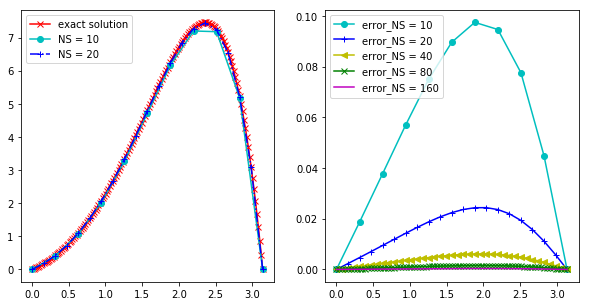

emax =  [0.09752619 0.02438907 0.00611501 0.00152864 0.00038215]
e_0 =  [0.11920166 0.02977152 0.00744093 0.00186011 0.00046502]
e_1 =  [0.17422736 0.04359787 0.01090174 0.00272557 0.0006814 ]
3.9987655891007594
3.988397028488046
4.0002964956885725
4.000074425074834


In [7]:
fd1d_bvp_test()

由上述结果可以看出， 差分格式关于范数 $ \|\cdot\|_\infty $ 二阶收敛， 结果和实际的估计相符合。

# Richardson 外推法

## 外推法基本思路
设未知量 $p$ 的一个近似值为 $ p_0(h) $ 并且当 $ h \rightarrow 0 $ 时, 有 $p_0(h) = p + \alpha h^2$, 则有

\begin{equation}
    p_1(h) = \dfrac{4}{3}p_0(\frac{h}{2}) - \dfrac{1}{3}p_0(h) = p + O(h^4)
\end{equation}

在差分方法中,记 $h$ 为步长,所得差分格式的解为 $ \quad u_i(h), \ 0 \leq i \leq m$ 有如下定理:

设两点边值问题 

\begin{equation}
    \begin{cases}
        - w^{\prime \prime}(x) +q(x)w(x) = \dfrac{1}{12}u^{(4)}(x), \quad  a < x < b \\
        w(a) = 0,  \quad w(b) = 0
    \end{cases}
\end{equation}

具有光滑解, 则
\begin{equation}
    \max\limits_{0 \leq i \leq m} \quad \left|u(x_i)-[\dfrac{4}{3}u_{2i} \ (\dfrac{h}{2}) - \dfrac{1}{3}u_i(h)] \right| = O(h^4)
\end{equation}

## 数值模拟
利用上面的例子,编写 $ Richardson $ 外推法的程序, 分别在 $ N =10, 20, 40, 80, 160 $ 的网格上利用 $ Richardson $ 外推
法进行求解上述方程; 

绘制 $ N = 10 $ 时的数值解曲线; $ N = 10, 20, 40 $ 的误差曲线, 并且验证 $ Richardson $ 外推法
关于 $ \| \cdot \|_{\infty} $ 范数是 $O(h^4)$ 算法

## $ Richardson $ 外推法程序编写

In [8]:
def richardson_fd1d_bvp(model, NS):
    # 获取 N = NS, N = 2NS 段网格上的数值解
    x1, uh1 = fd1d_bvp(model, NS)
    x2, uh2 = fd1d_bvp(model, 2 * NS)
    # 在 N = NS 的网格上使用 Richardson 外推
    x = x1
    uh = (4 / 3) * uh2[::2] - (1 / 3) * uh1
    return x, uh

##  $ Richardson $ 外推法测试程序编写

In [9]:
def richardson_test():
    # 初始化
    NS = [10, 20, 40, 80, 160]
    lbd = 0
    rbd = np.pi
    model = Model_Data(lbd, rbd)
        
    e0 = np.zeros(5)
    e1 = np.zeros(5)
    e_max = np.zeros(5)
    ee = [0 for i in range(5)]
    X = []
    UH = []
    
    for i in range(5):
        x, uh = richardson_fd1d_bvp(model, NS[i])  # 拿到网格和数值解
        ee[i], e0[i], e1[i], e_max[i] = fd1d_bvp_error(model.solution, uh, x)
        X.append(x)
        UH.append(uh)
    
    # 在最后一个网格上计算真解
    u = model.solution(X[-1])
    
    # 可视化
    # 绘制真解图像
    fig = plt.figure(figsize = (10, 5))
    ax1 = plt.subplot(121)
    ax1.plot(X[-1], u, color = "r", label = "exact_solution")
    ax1.plot(X[0], UH[0], ls = '--', color = 'c', marker = '<', label = "NS = 10")
    ax1.legend()
    
    # 绘制误差曲线
    colors = ['g', 'm', 'c']
    lss = ['--', '-.', ':']
    markers = ['*', '^', 'x']
    labels = ['error_NS = 10', 'error_NS = 20', 'error_NS = 40']
    ax2 = plt.subplot(122)
    for i in range(3):
        ax2.plot(X[i], ee[i], color = colors[i], ls = lss[i], marker = markers[i], label = labels[i])
    ax2.legend(loc = 'upper left')
    plt.show()     
    
    # 计算最大值范数的变化
    print("h          E_max(2h) / E_max(h)")
    for i in range(4):
        print("pi / " + str((20 * (2**i))), "  " ,e_max[i] / e_max[i+1])

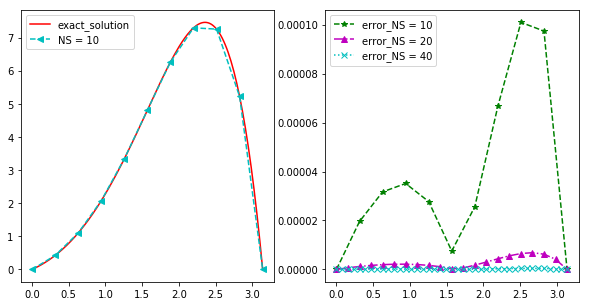

h          E_max(2h) / E_max(h)
pi / 20    14.740939191102909
pi / 40    15.894095685649912
pi / 80    15.973905170133767
pi / 160    15.994928802515686


In [10]:
richardson_test()

# 紧差分格式

 设 $ w = \left\lbrace w_i | 0 \leq i \leq m \right\rbrace  \in V_h $  定义如下算子 $\mathcal{A}$:
 
 \begin{equation}   
    (\mathcal{A}w)_i = \begin{cases}
        \dfrac{1}{12}(w_{i-1}+10w_i+w_{i+1}), & 1 \leq i \leq m-1, \\ 
        w_i, & i = 0, m.
    \end{cases}
 \end{equation}
 
 在方程
 \begin{equation}
      -u^{\prime \prime}(x_i) + q(x_i)u(x_i) = f(x_i), \quad 1 \leq i \leq m-1 
 \end{equation}
 
 两端同时用上述算子进行作用得到:
  \begin{equation}
      -\mathcal{A}u^{\prime \prime}(x_i) + \mathcal{A}[q(x_i)u(x_i)] = \mathcal{A}f(x_i), \quad 1 \leq i \leq m-1 
 \end{equation}
 
 通过计算,整理可得如下差分格式::
 \begin{equation}
     -\delta_x^2u_i + \dfrac{1}{12}[q(x_{i-1})u_{i-1} + 10 q(x_i)u_i + q(x_{i+1})u_{i+1}] = \dfrac{1}{12}[f(x_{i-1}) + 10f(x_i) + f(x_{i+1})]
 \end{equation}
 
 将上述方程改写为矩阵形式得:
 \begin{equation}
 D = \begin{pmatrix}
      -24 - 10h^2q(x_1) & 12-h^2q(x_2) & & & \\
    12 - h^2q(x_1) & -24 - 10h^2q(x_2) & 12-h^2q(x_3) & & \\
      & \ddots & \ddots & \ddots & &\\
      &      &  12-h^2q(x_{m-3}\ )  & -24 - 10h^2q(x_{m-2}\ ) & 12 - h^2q(x_{m-1} \ ) \\
      &      &    &   12 - h^2q(x_{m-2} \ ) &  -24 - 10h^2q(x_{m-1} \ )
 \end{pmatrix}
 \end{equation}
 
\begin{equation}
    u = \begin{pmatrix}
    u_1 \\ u_2 \\ \vdots \\ u_{m-2} \\u_{m-1}
    \end{pmatrix}
    \quad
    b = \begin{pmatrix}
    - h^2[f(x_0) + 10f(x_1) + f(x_2)] - [12 - h^2q(x_0)]\alpha \\
    - h^2[f(x_1) + 10f(x_2) + f(x_3)] \\
    \ddots \\
    - h^2[f(x_{m-3}\ ) + 10f(x_{m-2}\ ) + f(x_{m-1} \ )] \\
    - h^2[f(x_{m-2}\ ) + 10f(x_{m-1}\ ) + f(x_{m} \ )] - [12 - h^2q(x_m)]\beta
    \end{pmatrix}
\end{equation}

称上述格式为 $\color{red}{紧差分格式}$

## 紧差分格式的数值模拟

编写紧差分格式的程序, 利用上述例子进行数值模拟, 分别在 $ N = 10, 20, 40, 80, 160 $ 的网格上利用紧差分格式求解前面例子.

绘制 $ N = 10 $ 时的解曲线, 绘制 $ N = 10, 20, 40 $时的误差曲线, 并通过数值模拟验证紧差分格式 $ \|\cdot\|_{\infty} $范数下误差具有 $ O(h^4) $的收敛性

## 紧差分格式核心程序编写

In [11]:
def compact_fd1d_bvp(model, NS):
    # 获取网格
    x, h = model.mesh_init(NS)
    
    # 创建三对角线系数矩阵
    a = 12 - h**2 * model.q(x[1:-2])
    b = -24 - 10 * h**2 * model.q(x[1:-1])
    c = 12 - h**2 * model.q(x[2:-1])
    
    # 创建右端项
    rhs = -h**2 * (model.f(x[0:-2]) + 10 * model.f(x[1:-1]) + model.f(x[2:]))
    rhs[0] = rhs[0] - (12 - h**2 * model.q(x[0])) * model.solution(x[0])
    rhs[-1] = rhs[-1] - (12 - h**2 * model.q(x[-1])) * model.solution(x[-1])
    
    # 在网格上求得数值解
    uh = np.zeros(NS + 1)
    uh[1:-1] = thomas(a, b, c, rhs)
    uh[0] = model.solution(x[0])
    uh[-1] = model.solution(x[-1])
    
    return x, uh

## 紧差分格式测试程序

In [12]:
def compact_test():
    # 初始化
    NS = [10, 20, 40, 80, 160]
    lbd = 0
    rbd = np.pi
    model = Model_Data(lbd, rbd)
        
    e0 = np.zeros(5)
    e1 = np.zeros(5)
    e_max = np.zeros(5)
    ee = [0 for i in range(5)]
    X = []
    UH = []
    
    for i in range(5):
        x, uh = compact_fd1d_bvp(model, NS[i])  # 拿到网格和数值解
        ee[i], e0[i], e1[i], e_max[i] = fd1d_bvp_error(model.solution, uh, x)
        X.append(x)
        UH.append(uh)
    
    print(UH[0])
    # 在最后一个网格上计算真解
    u = model.solution(X[-1])
    
    # 可视化
    # 绘制真解图像
    fig = plt.figure(figsize = (10, 5))
    ax1 = plt.subplot(121)
    ax1.plot(X[-1], u, color = "r", label = "exact_solution")
    ax1.plot(X[0], UH[0], ls = '--', color = 'c', marker = '<', label = "NS = 10")
    ax1.legend()
    
    # 绘制误差曲线
    colors = ['g', 'm', 'c']
    lss = ['--', '-.', ':']
    markers = ['*', '^', 'x']
    labels = ['error_NS = 10', 'error_NS = 20', 'error_NS = 40']
    ax2 = plt.subplot(122)
    for i in range(3):
        ax2.plot(X[i], ee[i], color = colors[i], ls = lss[i], marker = markers[i], label = labels[i])
    ax2.legend(loc = 'upper left')
    plt.show()     
    
    # 计算最大值范数的变化
    print("h          E_max(2h) / E_max(h)")
    for i in range(4):
        print("pi / " + str((20 * (2**i))), "  " ,e_max[i] / e_max[i+1])

[0.00000000e+00 4.23102812e-01 1.10178869e+00 2.07615578e+00
 3.34145276e+00 4.81014599e+00 6.26318847e+00 7.29421831e+00
 7.25558488e+00 5.22238790e+00 2.83391752e-15]


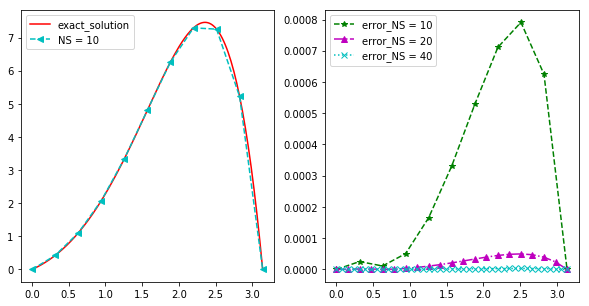

h          E_max(2h) / E_max(h)
pi / 20    15.91071291072469
pi / 40    15.97755788054319
pi / 80    15.991636035684488
pi / 160    15.990024945301219


In [13]:
compact_test()